# Prepare simulation

Test My Telescope cloned from Telescope of Philippe Gris

- author : Sylvie Dagoret-Campagne
- date   : Jun 29th 2018
- update : Jul 4th 2018


In [1641]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1642]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import numpy as np
import sys
import os
import pandas as pd
import glob
from matplotlib.backends.backend_pdf import PdfPages 

In [1643]:
from astropy.io import fits

In [1644]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [1645]:
from lsst.sims.photUtils import SignalToNoise
from lsst.sims.photUtils import PhotometricParameters
from lsst.sims.photUtils import Bandpass,Sed

In [1646]:
from MyTelescope import *
from MyThroughputs import *

In [1647]:
tel=Telescope(airmass=1.5)

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0


# Definition of SED files

- Picles in units erg/cm2/s/nm

In [1648]:
sed_file="regenerated_sedgrid_pickle_uvi.fits"

In [1649]:
sed_hdu = fits.open(sed_file)

In [1650]:
theheader=sed_hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                12963                                                  
NBSED   =                12962                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDUNIT = 'FLAM    '                                                            
SEDMODEL= 'pickle_uvi'                                                          
IDX_NUM =                   

In [1651]:
sidx_num=theheader['IDX_NUM']
sidx_val=theheader['IDX_VAL']
sidx_sed=theheader['IDX_SED']
sidx_data=theheader['IDX_DATA']
sidx_spec=theheader['IDX_SPEC']

In [1652]:
sed_data=sed_hdu[0].data

# Definition of Cadence file summary

In [1653]:
cadence_atm_program_file='cadence_field1000.csv'

In [1654]:
df=pd.read_csv(cadence_atm_program_file,index_col=False)

In [1655]:
df.head()

,Unnamed: 0,obshistid,nights,expdate,expmjd,airmass,filter,finseeing,transparency,filtskybrightness,fiveSigmaDepth,rawseeing,humidity
0,0,127633,173,14965194,59753.208268,1.370996,g,1.160634,0.25,21.732956,24.241311,0.704040,0.0
1,1,127670,173,14966692,59753.225609,1.274001,g,1.303756,0.25,21.791891,24.160844,0.859973,0.0
2,2,136947,189,16353504,59769.276675,1.025141,z,0.695528,0.00,19.037479,23.215870,0.504610,0.0
3,3,136993,189,16355480,59769.299544,1.012049,z,0.659361,0.00,19.223263,23.364350,0.462390,0.0
4,4,137990,190,16439213,59770.268672,1.030291,y,0.782293,0.00,17.300000,21.767917,0.633086,0.0


# Definition of atmospheric file

In [1656]:
atmospheric_file='cadence_field1000_atm_sim_{}.fits'.format(1)

In [1657]:
hdu = fits.open(atmospheric_file)

In [1658]:
hdu.info()

Filename: cadence_field1000_atm_sim_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (960, 913)   float64   


In [1659]:
theheader=hdu[0].header
theheader

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  960                                                  
NAXIS2  =                  913                                                  
NBATMSIM=                  912                                                  
ID_NUM  =                    0                                                  
ID_NIGHT=                    1                                                  
ID_DATE =                    2                                                  
ID_EXMJD=                    3                                                  
ID_AM   =                    4                                                  
ID_FILT =                    5                                                  
ID_VAOD =                   

In [1660]:
idx_num=theheader['ID_NUM']
idx_night=theheader['ID_NIGHT']
idx_date=theheader['ID_DATE']
idx_date=theheader['ID_EXMJD']
idx_am=theheader['ID_AM']
idx_filt=theheader['ID_FILT']
idx_vaod=theheader['ID_VAOD']
idx_pwv=theheader['ID_PWV']
idx_o3=theheader['ID_O3']
idx_res=theheader['ID_RES']

In [1661]:
atmdata=hdu[0].data

In [1662]:
NBATM=atmdata.shape[0]-1

# Check Atm Simulations

In [1663]:
am=atmdata[1:,idx_am] # airmass distribution
filt=atmdata[1:,idx_filt] # filter distribution
vaod=atmdata[1:,idx_vaod] # aerosols distribution
pwv=atmdata[1:,idx_pwv] # pwv distribution
o3=atmdata[1:,idx_o3] # o3 distribution

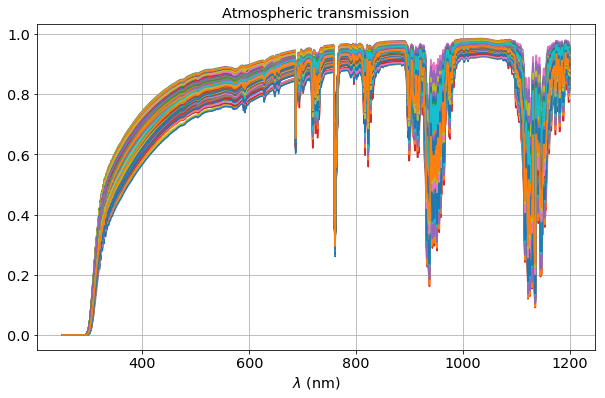

In [1664]:
for count in np.arange(NBATM):
    plt.plot(atmdata[0,idx_res:],atmdata[count+1,idx_res:])
plt.grid(True)
plt.title("Atmospheric transmission")
plt.xlabel("$\lambda$ (nm)")

In [1665]:
tel=Telescope()

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/
**** Telescope.__init__******
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0
Telescope::ZP_filtre: hello Cte= 5326.68735237  Diam= 6.423 h= 6.62607004e-34  exptime= 15.0


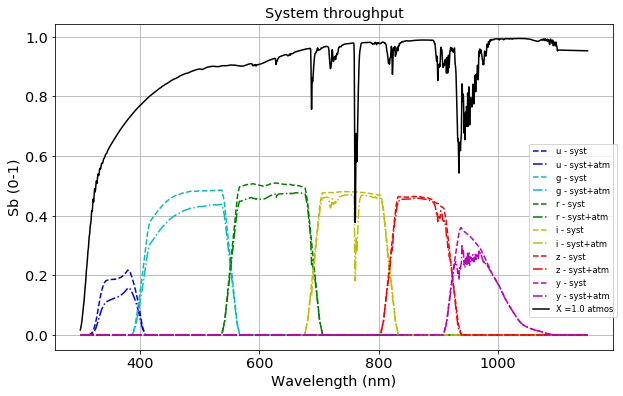

In [1666]:
tel.Plot_Throughputs()

# Set an observation atmosphere

In [1667]:
idx=1
am=atmdata[idx,idx_am] 
wl=atmdata[0,idx_res:]
tr=atmdata[idx,idx_res:]

In [1668]:
wl.shape

(951,)

In [1669]:
tr.shape

(951,)

In [1670]:
tel.Set_Atmosphere(am,wl,tr)

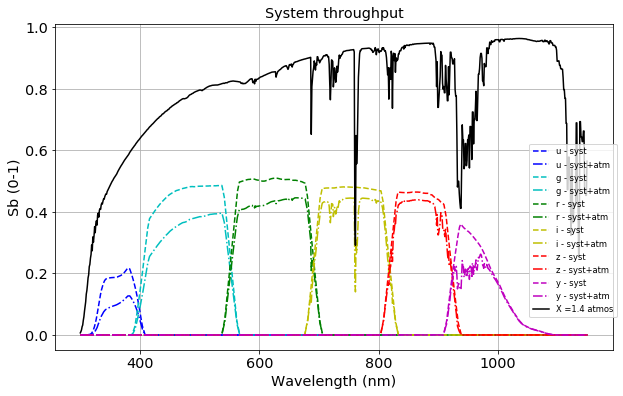

In [1671]:
tel.Plot_Throughputs()

In [1672]:
tel.Set_SEDAB()

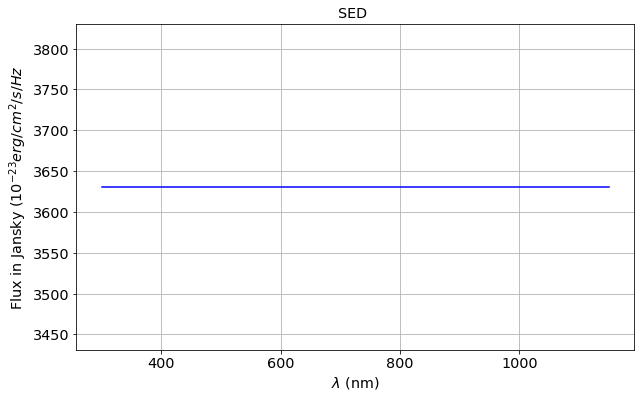

In [1673]:
tel.Plot_SED()

In [1674]:
tel.CalcMyMagnitudes()

CalcMyMagnitudes :: band = 0, mag1= 6.562228223394584e-05 , mag2= -4.584525205216706
CalcMyMagnitudes :: band = 1, mag1= 6.562228223394584e-05 , mag2= -6.4904636569764795
CalcMyMagnitudes :: band = 2, mag1= 6.562228223394584e-05 , mag2= -6.353273647189731
CalcMyMagnitudes :: band = 3, mag1= 6.562228223394584e-05 , mag2= -6.0293862961870195
CalcMyMagnitudes :: band = 4, mag1= 6.562228223394584e-05 , mag2= -5.636751186802147
CalcMyMagnitudes :: band = 5, mag1= 6.562228223394584e-05 , mag2= -4.762726385992066


(array([  6.56222822e-05,   6.56222822e-05,   6.56222822e-05,
          6.56222822e-05,   6.56222822e-05,   6.56222822e-05]),
 array([-4.58452521, -6.49046366, -6.35327365, -6.0293863 , -5.63675119,
        -4.76272639]))

In [1675]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1676]:
tel.CalcMyZP()

CalcMyZP :: band = 0, zp1 = 29.096348966453963, zp2= -4.584525205216705, deltazp= 33.680874171670666
CalcMyZP :: band = 1, zp1 = 31.002287418213736, zp2= -6.4904636569764795, deltazp= 37.49275107519021
CalcMyZP :: band = 2, zp1 = 30.865097408426987, zp2= -6.353273647189731, deltazp= 37.218371055616714
CalcMyZP :: band = 3, zp1 = 30.541210057424273, zp2= -6.0293862961870195, deltazp= 36.57059635361129
CalcMyZP :: band = 4, zp1 = 30.1485749480394, zp2= -5.636751186802147, deltazp= 35.78532613484155
CalcMyZP :: band = 5, zp1 = 29.274550147229316, zp2= -4.762726385992066, deltazp= 34.03727653322138


# Take one SED from input

## Start with AB source


$$
S_\lambda (\lambda) = \frac{c}{\lambda^2} S_\nu(\lambda)
$$

In [1677]:
M0=48.6           # magnitude of a AB source
S_nu0=10**(-M0/2.5) # flux in erg/cm2/s/Hz : 3.630780547701003e-20
c=2.99792458e10    # speed of light in cm/s in CGS
nm_to_cm=1e-7      # conversion nm to cm 
wavelength=np.arange(300.,1151.,1)
S_lambda0=S_nu0*c/(nm_to_cm)/wavelength**2   # in erg/cm2/s/nm

In [1678]:
ab0=Sed(wavelen=wavelength,flambda=S_lambda0,fnu=0,name="AB")
ab0.flambdaTofnu()

In [1679]:
tel.Set_SED(wavel=wavelength,newsed=S_lambda0,name='TestAB')

In [1680]:
tel.CalcMyABMagnitudes()

CalcMyABMagnitudes :: band = 0, mag1= -4.584525205216706 , mag2= -4.584525205216705
CalcMyABMagnitudes :: band = 1, mag1= -6.4904636569764795 , mag2= -6.4904636569764795
CalcMyABMagnitudes :: band = 2, mag1= -6.353273647189731 , mag2= -6.353273647189731
CalcMyABMagnitudes :: band = 3, mag1= -6.0293862961870195 , mag2= -6.0293862961870195
CalcMyABMagnitudes :: band = 4, mag1= -5.636751186802147 , mag2= -5.636751186802147
CalcMyABMagnitudes :: band = 5, mag1= -4.762726385992066 , mag2= -4.762726385992066


array([ -8.88178420e-16,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [1681]:
tel.CalcMyABMagnitudesErrors()

array([ 0.0075,  0.005 ,  0.005 ,  0.005 ,  0.0075,  0.0075])

## Select a Pickle

$S_\lambda(\lambda)$ in erg/cm2/s/nm

In [1682]:
idx=1

In [1683]:
picklename='Pickle {}'.format(idx)

In [1684]:
wl=sed_data[0,sidx_spec:]/10.
flux=sed_data[idx+1,sidx_spec:]*10.

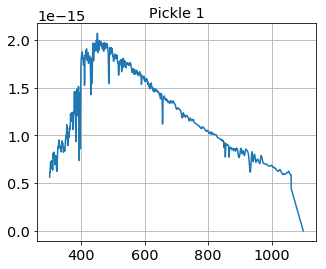

In [1685]:
plt.figure(figsize=(5,4))
plt.plot(wl,flux)
plt.grid(True)
plt.title(picklename)

In [1686]:
tel.Set_SED(wavel=wl,newsed=flux,name=picklename)
tel.CalcMyABMagnitudes()

CalcMyABMagnitudes :: band = 0, mag1= 15.040272179738139 , mag2= -4.584525205216705
CalcMyABMagnitudes :: band = 1, mag1= 12.037367698799844 , mag2= -6.4904636569764795
CalcMyABMagnitudes :: band = 2, mag1= 11.831211214604863 , mag2= -6.353273647189731
CalcMyABMagnitudes :: band = 3, mag1= 12.03126866702985 , mag2= -6.0293862961870195
CalcMyABMagnitudes :: band = 4, mag1= 12.393859182437224 , mag2= -5.636751186802147
CalcMyABMagnitudes :: band = 5, mag1= 13.262598361248898 , mag2= -4.762726385992066


/sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_photUtils/2.7.0.sims/python/lsst/sims/photUtils/Sed.py:775: UserWarning: There is an area of non-overlap between desired wavelength range  (300.00 to 1150.00)and sed Pickle 1 (300.00 to 1100.00)
  + 'and sed %s (%.2f to %.2f)' % (self.name, wavelen.min(), wavelen.max()))


array([ 19.62479738,  18.52783136,  18.18448486,  18.06065496,
        18.03061037,  18.02532475])

In [1687]:
tel.CalcMyABMagnitudesErrors()

array([ 0.01406356,  0.00554835,  0.00547054,  0.00559165,  0.00814726,
        0.00943955])

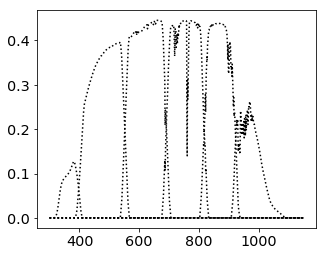

In [1688]:
tel.Plot_Filter()

# Calculation of M5

This calculation is conformed wrt that of cadence MINION\_1016

In [1689]:
tel.m5

{'u': 23.480534637970734,
 'g': 24.817811657415419,
 'r': 24.380711489989597,
 'i': 23.926605444859131,
 'z': 23.357879052198577,
 'y': 22.448794772986531}

# Calculation of Sky magnitude 
This calculation is conformed wrt that of candence MINION\_1016

In [1690]:
tel.mag_sky

{'u': 22.954213203947301,
 'g': 22.240907156965672,
 'r': 21.197848674541213,
 'i': 20.473442917237939,
 'z': 19.599177508703946,
 'y': 18.632337558754919}

# Tb

In [1691]:
tel.Tb

{'u': 0.02389353757290916,
 'g': 0.12373272559595787,
 'r': 0.10389760335122504,
 'i': 0.075800043913462234,
 'z': 0.052738694666968504,
 'y': 0.024799736863257843}

# Sigmab

In [1692]:
tel.Sigmab

{'u': 0.035785915980876104,
 'g': 0.1432890267516797,
 'r': 0.11262226010146574,
 'i': 0.080432840046432835,
 'z': 0.054764490348215365,
 'y': 0.028509921564443697}

# zp

In [1693]:
tel.zp

{'u': 26.568808659711557,
 'g': 28.354318973347311,
 'r': 28.164621348129035,
 'i': 27.822281167154159,
 'z': 27.428430965039809,
 'y': 26.60922520603166}

# ADU_zp

In [1694]:
tel.ADU_zp

{'u': 146.54784684629368,
 'g': 113.3120538362018,
 'r': 106.06362523506563,
 'i': 103.82733449370409,
 'z': 101.60555027615993,
 'y': 112.48554270045459}

# Flux Sky

In [1695]:
tel.flux_sky

{'u': 47.502678204957043,
 'g': 474.50920325318293,
 'r': 1041.3314451434417,
 'i': 1480.5231873959744,
 'z': 2304.5243223433558,
 'y': 2640.1887275610579}

In [1696]:
thrpt=Throughputs()

**** Throughputs.__init__****
System loaded from /sps/lsst/software/lsst_sims/sims_2_7_0/stack/miniconda3-4.3.21-10a4fa6/Linux64/throughputs/2017.01.31-6-g29ce4f5/baseline/


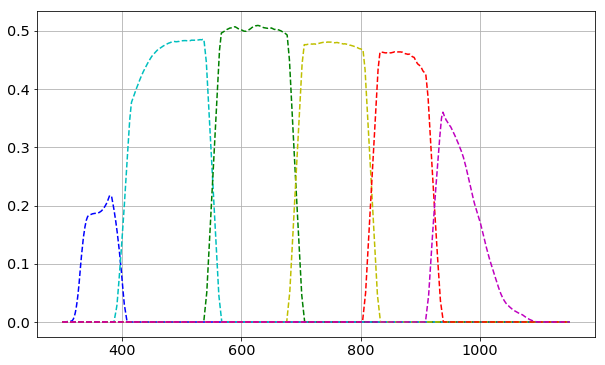

In [1697]:
for i,band in enumerate(thrpt.filterlist):
    #plt.plot(self.lsst_std[band].wavelen,self.lsst_std[band].sb,linestyle='-',color=self.filtercolors[band], label='%s - std' %(band))
    plt.plot(thrpt.lsst_system[band].wavelen,thrpt.lsst_system[band].sb,linestyle='--',color=thrpt.filtercolors[band], label='%s - syst' %(band))
plt.grid()

In [1698]:
df=pd.DataFrame({"wlu":thrpt.lsst_system['u'].wavelen,"u":thrpt.lsst_system['u'].sb,
                "wlg":thrpt.lsst_system['g'].wavelen,"g":thrpt.lsst_system['g'].sb,
                "wlr":thrpt.lsst_system['r'].wavelen,"r":thrpt.lsst_system['r'].sb,
                "wli":thrpt.lsst_system['i'].wavelen,"i":thrpt.lsst_system['i'].sb,
                "wlz":thrpt.lsst_system['z'].wavelen,"z":thrpt.lsst_system['z'].sb,
                "wly":thrpt.lsst_system['y'].wavelen,"y":thrpt.lsst_system['y'].sb}
               )

In [1699]:
df

,g,i,r,u,wlg,wli,wlr,wlu,wly,wlz,y,z
0,0.0,0.0,0.0,0.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0,0.0
1,0.0,0.0,0.0,0.0,300.1,300.1,300.1,300.1,300.1,300.1,0.0,0.0
2,0.0,0.0,0.0,0.0,300.2,300.2,300.2,300.2,300.2,300.2,0.0,0.0
3,0.0,0.0,0.0,0.0,300.3,300.3,300.3,300.3,300.3,300.3,0.0,0.0
4,0.0,0.0,0.0,0.0,300.4,300.4,300.4,300.4,300.4,300.4,0.0,0.0
5,0.0,0.0,0.0,0.0,300.5,300.5,300.5,300.5,300.5,300.5,0.0,0.0
6,0.0,0.0,0.0,0.0,300.6,300.6,300.6,300.6,300.6,300.6,0.0,0.0
7,0.0,0.0,0.0,0.0,300.7,300.7,300.7,300.7,300.7,300.7,0.0,0.0
8,0.0,0.0,0.0,0.0,300.8,300.8,300.8,300.8,300.8,300.8,0.0,0.0
9,0.0,0.0,0.0,0.0,300.9,300.9,300.9,300.9,300.9,300.9,0.0,0.0


# Check the Dark-sky SED

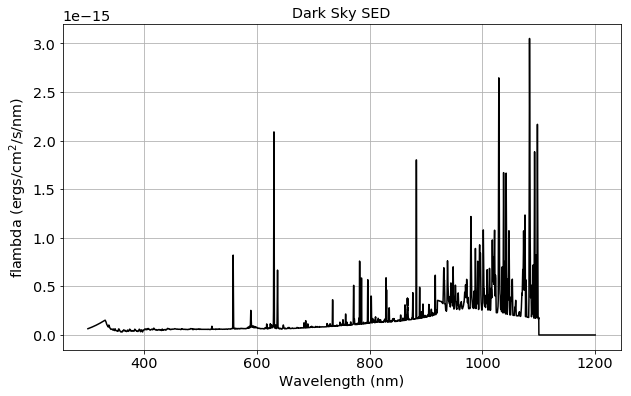

In [1700]:
thrpt.Plot_DarkSky()